# $\color{ForestGreen}{\text{Laser Stability Dataset}}$
In this dataset we have 3531 lasers. The output power of the laser beam intensity is measured $T$ hours after it starts lasing, where $T$ = 2, 20, 40, 60 hours. We also know whether is made with material 1 or 2 and whether it has a heatsink or not. The last column indicates whether the laser still outputs a stable beam after 1000 hours of operation. Our goal is predicting this outcome from the short-term measuments (the first four column of the dataset), material type, and existence of heatsink.

In [1]:
# Importing the libraries that will be used in this notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

In [2]:
# Loading the dataset
df = pd.read_csv('https://raw.githubusercontent.com/simsekergun/ENEE691/main/week08/laser_stability.csv')     # Reading the csv source file as a dataframe
df.shape

(3531, 7)

In [3]:
# Displaying a sample of 5 rows 
df.sample(5)

,2h,20h,40h,60h,material,heatsink,StableOrNot
2428,1.0001,0.99853,0.98988,0.99393,2,0,0
3060,1.0028,1.00070,1.00540,0.99974,1,1,1
317,1.0025,0.99409,1.00140,0.99897,1,1,1
2467,1.0026,1.00020,1.00440,1.00380,1,1,1
2423,1.0001,0.99915,1.00400,1.00240,1,1,1


In [4]:
# Finding the size of each class
print('Size of class 0:', len(df[df.StableOrNot==0]))
print('Size of class 1:', len(df[df.StableOrNot==1]))
print('Size of the dataset:', len(df))

Size of class 0: 1847
Size of class 1: 1684
Size of the dataset: 3531


In [5]:
# Breaking features to continuous and categorical ones
cont_features = ['2h', '20h', '40h', '60h']
cat_features = ['material', 'heatsink']

## $\color{ForestGreen}{\text{LDA Classifier}}$
We first perform classification employing the LDA classifier as follows.

In [6]:
# Defining the continuous features and the target of the model
X = df[cont_features].values     # Features
y = df.StableOrNot.values       # Target 

In [7]:
# Breaking the data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [8]:
lda_clf = LinearDiscriminantAnalysis()     # Instantiating the lda classifier
lda_clf.fit(X_train, y_train)              # Fitting the train data

LinearDiscriminantAnalysis()

In [9]:
# Finding the predictions of the lda classifier for train and test subsets 

train_y_pred = lda_clf.predict(X_train)
test_y_pred = lda_clf.predict(X_test)

In [10]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

train_score = metrics.accuracy_score(y_train, train_y_pred)   # Compute train accuracy
test_score = metrics.accuracy_score(y_test, test_y_pred)      # Compute test accuracy
train_report = classification_report(y_train, train_y_pred)   # Generate classification report for train data
test_report = classification_report(y_test, test_y_pred)      # Generate classification report for test data

print('LDA Train Classification Report: \n\n', train_report,'\n\n')
print('LDA Test Classification Report: \n\n', test_report)

LDA Train Classification Report: 

               precision    recall  f1-score   support

           0       0.95      0.88      0.91      1478
           1       0.88      0.95      0.91      1346

    accuracy                           0.91      2824
   macro avg       0.91      0.91      0.91      2824
weighted avg       0.91      0.91      0.91      2824
 


LDA Test Classification Report: 

               precision    recall  f1-score   support

           0       0.96      0.87      0.91       369
           1       0.87      0.96      0.91       338

    accuracy                           0.91       707
   macro avg       0.91      0.91      0.91       707
weighted avg       0.92      0.91      0.91       707



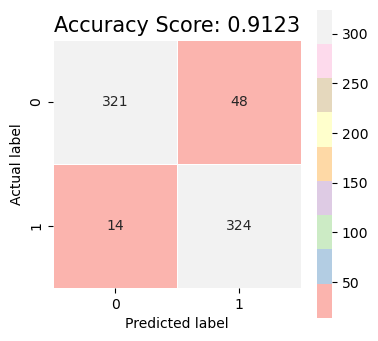

In [11]:
# Computing lda confusion matrix
lda_c_matrix = confusion_matrix(y_test, test_y_pred)

plt.figure(figsize=(4,4))
sns.heatmap(lda_c_matrix, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(test_score, 4))
plt.title(all_sample_title, size = 15);
plt.show()

In [12]:
# Finding probabilities of test instances predicted by lda classifier
lda_clf.predict_proba(X_test[:10])

array([[9.77944127e-01, 2.20558730e-02],
       [5.91543659e-02, 9.40845634e-01],
       [9.75714414e-01, 2.42855859e-02],
       [9.66934640e-01, 3.30653603e-02],
       [6.91993288e-03, 9.93080067e-01],
       [5.61740703e-02, 9.43825930e-01],
       [9.99715437e-01, 2.84562707e-04],
       [7.60215373e-01, 2.39784627e-01],
       [3.59803802e-01, 6.40196198e-01],
       [4.42063116e-02, 9.55793688e-01]])

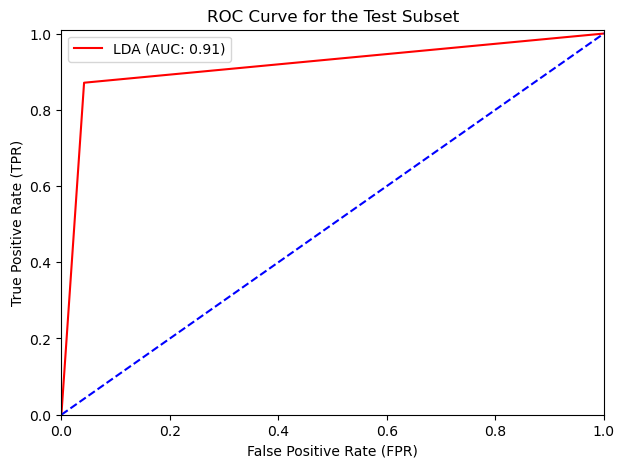

In [13]:
# Plotting the ROC curve for the test subset
fpr, tpr, thresholds = roc_curve(test_y_pred, y_test)  # Computing ROC for the test subset
auc(fpr, tpr)                                          # Computing AUC for the test subset 

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='red', label='LDA (AUC: %.2f)'
% auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.title('ROC Curve for the Test Subset')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

The performance of LDA classifier is pretty strong. No sings of overfitting.

## $\color{ForestGreen}{\text{QDA Classifier}}$
Now, we perform classification employing the QDA classifier (for the continuous features).

In [14]:
qda_clf = QuadraticDiscriminantAnalysis()      # Instantiating the QDA classifier
qda_clf.fit(X_train, y_train)                  # Fitting the training data

QuadraticDiscriminantAnalysis()

In [15]:
# Finding predictions of qda classifier for the train and test subsets

train_y_pred = qda_clf.predict(X_train)
test_y_pred = qda_clf.predict(X_test)

In [16]:
train_score = metrics.accuracy_score(y_train, train_y_pred)   # Compute train accuracy
test_score = metrics.accuracy_score(y_test, test_y_pred)      # Compute test accuracy
train_report = classification_report(y_train, train_y_pred)   # Generate classification report for train data
test_report = classification_report(y_test, test_y_pred)      # Generate classification report for test data

print('QDA Train Classification Report: \n\n', train_report,'\n\n')
print('QDA Test Classification Report: \n\n', test_report)

QDA Train Classification Report: 

               precision    recall  f1-score   support

           0       0.95      0.91      0.93      1478
           1       0.90      0.94      0.92      1346

    accuracy                           0.92      2824
   macro avg       0.92      0.93      0.92      2824
weighted avg       0.93      0.92      0.92      2824
 


QDA Test Classification Report: 

               precision    recall  f1-score   support

           0       0.94      0.91      0.93       369
           1       0.91      0.93      0.92       338

    accuracy                           0.92       707
   macro avg       0.92      0.92      0.92       707
weighted avg       0.92      0.92      0.92       707



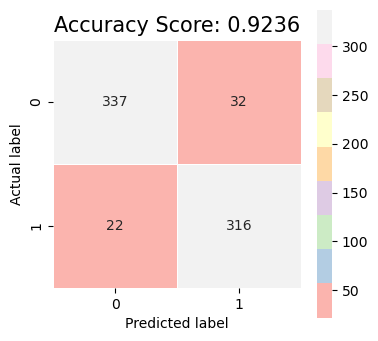

In [17]:
# Computing qda confusion matrix

qda_c_matrix = confusion_matrix(y_test, test_y_pred)

plt.figure(figsize=(4,4))
sns.heatmap(qda_c_matrix, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(test_score, 4))
plt.title(all_sample_title, size = 15);
plt.show()

In [18]:
# Finding probabilities of test instances predicted by qda classifier

qda_clf.predict_proba(X_test[:10])

array([[9.99998438e-01, 1.56220877e-06],
       [1.13525268e-02, 9.88647473e-01],
       [9.98291193e-01, 1.70880651e-03],
       [9.92462672e-01, 7.53732794e-03],
       [1.91054345e-02, 9.80894566e-01],
       [5.40437832e-03, 9.94595622e-01],
       [9.99999999e-01, 1.33907772e-09],
       [9.27795160e-01, 7.22048401e-02],
       [4.87395104e-01, 5.12604896e-01],
       [2.16468534e-02, 9.78353147e-01]])

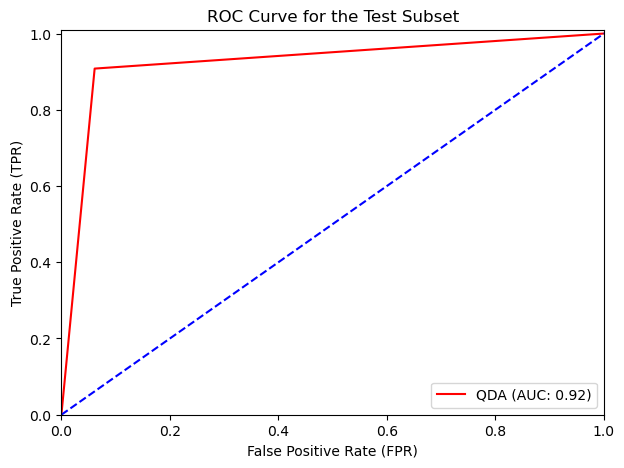

In [19]:
# Plotting the ROC curve for the test subset

from sklearn.metrics import roc_curve, auc   # Importing 'roc_curve' and 'auc' from sklearn

fpr, tpr, thresholds = roc_curve(test_y_pred, y_test)  # Computing ROC for the test subset
auc(fpr, tpr)                                          # Computing AUC for the test subset 

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='red', label='QDA (AUC: %.2f)'
% auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.title('ROC Curve for the Test Subset')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

QDA performs slightly better than LDA. Again, no overfitting is observed.

## $\color{ForestGreen}{\text{Logistic Regression}}$
We now apply logistic regression to the same classification problem to compare the results.

In [20]:
from sklearn.linear_model import LogisticRegression   # Importing Logistic Regression from sklearn

logreg = LogisticRegression(penalty = 'none', max_iter = 10000) # Instantiating logistic regression 

logreg.fit(X_train, y_train)  # Fitting the train data to 'logreg'

train_y_pred = logreg.predict_proba(X_train).argmax(axis=1)  # Predicting the class for train set
test_y_pred = logreg.predict_proba(X_test).argmax(axis=1)    # Predicting the class for test set

In [21]:
train_score = metrics.accuracy_score(y_train, train_y_pred)   # Compute train accuracy
test_score = metrics.accuracy_score(y_test, test_y_pred)      # Compute test accuracy
train_report = classification_report(y_train, train_y_pred)   # Generate classification report for train data
test_report = classification_report(y_test, test_y_pred)      # Generate classification report for test data

print('Logistic Regression Train Classification Report: \n\n', train_report,'\n\n')
print('Logistic Regression Test Classification Report: \n\n', test_report)

Logistic Regression Train Classification Report: 

               precision    recall  f1-score   support

           0       0.93      0.91      0.92      1478
           1       0.90      0.92      0.91      1346

    accuracy                           0.91      2824
   macro avg       0.91      0.91      0.91      2824
weighted avg       0.91      0.91      0.91      2824
 


Logistic Regression Test Classification Report: 

               precision    recall  f1-score   support

           0       0.93      0.92      0.92       369
           1       0.91      0.92      0.91       338

    accuracy                           0.92       707
   macro avg       0.92      0.92      0.92       707
weighted avg       0.92      0.92      0.92       707



The overall performance of the logistic regression is not very different than the LDA or QDA classifier.

## $\color{ForestGreen}{\text{Gaussian Naive Bayes Classifier}}$
We now apply Gaussian naive Bayes to the same classification problem to compare the results.

In [22]:
gnb_clf = GaussianNB()            # Instantiating the gaussian naive Bayes classifier
gnb_clf.fit(X_train, y_train)     # Fitting the training data

GaussianNB()

In [23]:
# Finding the predictions of gaussian naive Bayes for train and test subsets

train_y_pred = gnb_clf.predict(X_train)
test_y_pred = gnb_clf.predict(X_test)

In [24]:
train_score = metrics.accuracy_score(y_train, train_y_pred)   # Compute train accuracy
test_score = metrics.accuracy_score(y_test, test_y_pred)      # Compute test accuracy
train_report = classification_report(y_train, train_y_pred)   # Generate classification report for train data
test_report = classification_report(y_test, test_y_pred)      # Generate classification report for test data

print('Gaussian NB Train Classification Report: \n\n', train_report,'\n\n')
print('Gaussian NB Test Classification Report: \n\n', test_report)

Gaussian NB Train Classification Report: 

               precision    recall  f1-score   support

           0       0.92      0.88      0.90      1478
           1       0.87      0.92      0.90      1346

    accuracy                           0.90      2824
   macro avg       0.90      0.90      0.90      2824
weighted avg       0.90      0.90      0.90      2824
 


Gaussian NB Test Classification Report: 

               precision    recall  f1-score   support

           0       0.92      0.89      0.91       369
           1       0.89      0.91      0.90       338

    accuracy                           0.90       707
   macro avg       0.90      0.90      0.90       707
weighted avg       0.90      0.90      0.90       707



The performance of Gaussian NB is slightly poorer than others.

## $\color{ForestGreen}{\text{Multinomial Naive Bayes Classifier}}$
Now, we would like to see what we can learn from the categorical features. We apply the classical naive Bayes classifier to the heart disease dataset with categorical features.

In [25]:
# Defining the features and the target of the model
X = df[cat_features].values     # Features
y = df.StableOrNot.values      # Target 

In [26]:
# Breaking the data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [27]:
mnb_clf = MultinomialNB()        # Instantiating the multinomial naive Bayes classifier
mnb_clf.fit(X_train, y_train)    # Fitting the training data

MultinomialNB()

In [28]:
# Finding the predictions of multinomial naive Bayes for train and test subsets
train_y_pred = mnb_clf.predict(X_train)
test_y_pred = mnb_clf.predict(X_test)

In [29]:
train_score = metrics.accuracy_score(y_train, train_y_pred)   # Compute train accuracy
test_score = metrics.accuracy_score(y_test, test_y_pred)      # Compute test accuracy
train_report = classification_report(y_train, train_y_pred)   # Generate classification report for train data
test_report = classification_report(y_test, test_y_pred)      # Generate classification report for test data

print('Multinomial NB Train Classification Report: \n\n', train_report,'\n\n')
print('Multinomial NB Test Classification Report: \n\n', test_report)

Multinomial NB Train Classification Report: 

               precision    recall  f1-score   support

           0       0.91      0.89      0.90      1478
           1       0.89      0.90      0.89      1346

    accuracy                           0.90      2824
   macro avg       0.90      0.90      0.90      2824
weighted avg       0.90      0.90      0.90      2824
 


Multinomial NB Test Classification Report: 

               precision    recall  f1-score   support

           0       0.93      0.92      0.92       369
           1       0.91      0.92      0.92       338

    accuracy                           0.92       707
   macro avg       0.92      0.92      0.92       707
weighted avg       0.92      0.92      0.92       707



In [30]:
# Finding probabilities of test instances predicted by multinomial naive Bayes classifier
mnb_clf.predict_proba(X_test[:10])

array([[0.76462079, 0.23537921],
       [0.18305454, 0.81694546],
       [0.65381868, 0.34618132],
       [0.76462079, 0.23537921],
       [0.18305454, 0.81694546],
       [0.65381868, 0.34618132],
       [0.76462079, 0.23537921],
       [0.27818683, 0.72181317],
       [0.65381868, 0.34618132],
       [0.18305454, 0.81694546]])

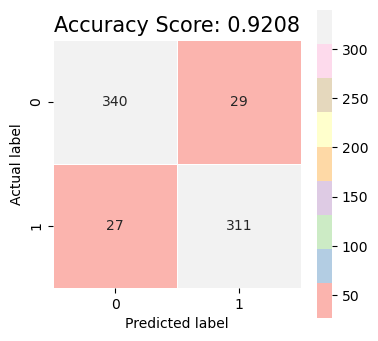

In [31]:
# Computing multinomial naive Bayes confusion matrix

mnb_c_matrix = confusion_matrix(y_test, test_y_pred)

plt.figure(figsize=(4,4))
sns.heatmap(mnb_c_matrix, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(test_score, 4))
plt.title(all_sample_title, size = 15);
plt.show()

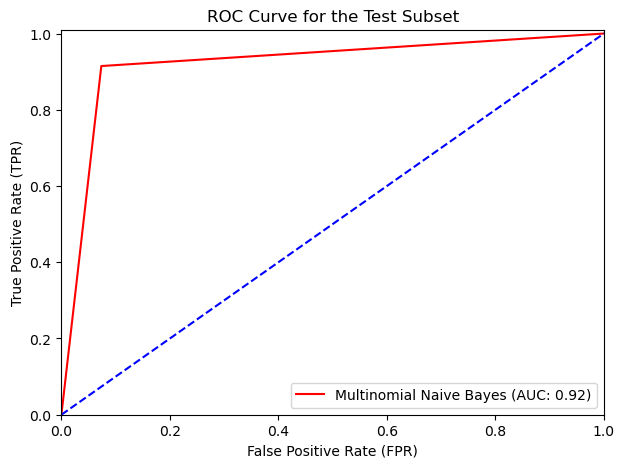

In [32]:
# Plotting the ROC curve for the test subset
fpr, tpr, thresholds = roc_curve(test_y_pred, y_test)  # Computing ROC for the test subset
auc(fpr, tpr)                                          # Computing AUC for the test subset 

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='red', label='Multinomial Naive Bayes (AUC: %.2f)'
% auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.title('ROC Curve for the Test Subset')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

As observed above, the multinomial naive Bayes classifier performs as strong as the previous classifiers. This indicates that perhaps the categorical features in this dataset are as significant as the continuous features for determining the existence of instability issue.